In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [81]:
POSTERIOR_ALPHA_P1 = 97
POSTERIOR_BETA_P1 = 105
POSTERIOR_ALPHA_P2 = 110
POSTERIOR_BETA_P2 = 667

def compute_posterior_interval(alpha, beta, density):
    return stats.beta.interval(density, alpha, beta)

def compute_asymptotic_interval(alpha, beta, density):
    mean = alpha/(alpha + beta)
    variance = alpha*beta/np.power(alpha + beta, 3)
    delta = np.sqrt(variance)*stats.norm.isf((1-density)/2)
    return (mean - delta, mean + delta)

def compute_beta_sample_interval(alpha, beta, density, n=1000):
    samples = np.sort(stats.beta.rvs(alpha, beta, size=(n,)))
    return compute_sample_interval(samples, density), samples

def compute_sample_interval(samples, density):
    n = len(samples)
    num_tails = np.round(n*(1-density)/2).astype(np.int64)
    return (samples[num_tails],samples[-num_tails])

def plot_sample_distribution(ax, samples):
    sns.distplot(samples, ax=ax, kde=False)
    ax.grid(True)

In [82]:
compute_posterior_interval(POSTERIOR_ALPHA_P1, POSTERIOR_BETA_P1, 0.9)

(0.42261190387657527, 0.5380076538906422)

In [83]:
compute_asymptotic_interval(POSTERIOR_ALPHA_P1, POSTERIOR_BETA_P1, 0.9)

(0.4223776693941238, 0.5380183702098366)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.42547121922268305, 0.5392616822220141)

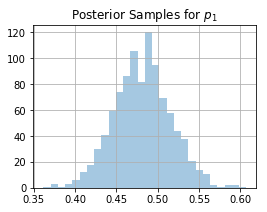

In [84]:
np.random.seed(2018)
interval, samples = compute_beta_sample_interval(POSTERIOR_ALPHA_P1, POSTERIOR_BETA_P1, 0.9)

fig = plt.figure(figsize=(4,3))
ax = fig.gca()
plot_sample_distribution(ax, samples)
ax.set_title('Posterior Samples for $p_1$')
fig.savefig('p1_p1.pdf')
interval

In [85]:
compute_posterior_interval(POSTERIOR_ALPHA_P2, POSTERIOR_BETA_P2, 0.9)

(0.12154851125370263, 0.1626412114257485)

In [86]:
compute_asymptotic_interval(POSTERIOR_ALPHA_P2, POSTERIOR_BETA_P2, 0.9)

(0.12099916127723108, 0.16214112186305207)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.12092804249574873, 0.16337525399804356)

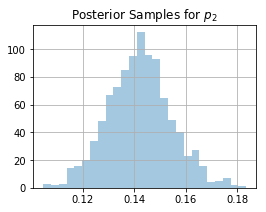

In [87]:
np.random.seed(2018)
interval, samples = compute_beta_sample_interval(POSTERIOR_ALPHA_P2, POSTERIOR_BETA_P2, 0.9)

fig = plt.figure(figsize=(4,3))
ax = fig.gca()
plot_sample_distribution(ax, samples)
ax.set_title('Posterior Samples for $p_2$')
fig.savefig('p1_p2.pdf')
interval

5.648589514021282


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(6.313684765774096, 6.47549282845376)

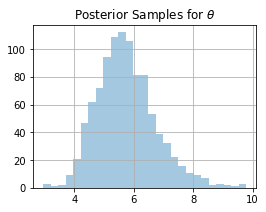

In [90]:
np.random.seed(2018)
joint_beta_samples = stats.beta.rvs(
    np.expand_dims([POSTERIOR_ALPHA_P1, POSTERIOR_ALPHA_P2], -1),
    np.expand_dims([POSTERIOR_BETA_P1, POSTERIOR_BETA_P2], -1), size=(2, 1000))
theta_samples = (joint_beta_samples[0]/(1 - joint_beta_samples[0]))/(joint_beta_samples[1]/(1 - joint_beta_samples[1]))

fig = plt.figure(figsize=(4,3))
ax = fig.gca()
plot_sample_distribution(ax, theta_samples)
ax.set_title('Posterior Samples for $\\theta$')
fig.savefig('p1_theta.pdf')
print(np.median(theta_samples))
compute_sample_interval(theta_samples, 0.9)